In [1]:
%matplotlib inline
import sqlite3
import pandas as pd   
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.stem.porter import PorterStemmer

In [2]:
con = sqlite3.connect('database.sqlite') 

display =pd.read_sql_query("""
    SELECT *  
    FROM Reviews
    Where score !=3 AND Userid="AR5J8UI46CURR"
    ORDER BY ProductID
                           """,con)
display

Id   ProductId         UserId      ProfileName  HelpfulnessNumerator  \
0   78445  B000HDL1RQ  AR5J8UI46CURR  Geetha Krishnan                     2   
1  138317  B000HDOPYC  AR5J8UI46CURR  Geetha Krishnan                     2   
2  138277  B000HDOPYM  AR5J8UI46CURR  Geetha Krishnan                     2   
3   73791  B000HDOPZG  AR5J8UI46CURR  Geetha Krishnan                     2   
4  155049  B000PAQ75C  AR5J8UI46CURR  Geetha Krishnan                     2   

   HelpfulnessDenominator  Score        Time  \
0                       2      5  1199577600   
1                       2      5  1199577600   
2                       2      5  1199577600   
3                       2      5  1199577600   
4                       2      5  1199577600   

                             Summary  \
0  LOACKER QUADRATINI VANILLA WAFERS   
1  LOACKER QUADRATINI VANILLA WAFERS   
2  LOACKER QUADRATINI VANILLA WAFERS   
3  LOACKER QUADRATINI VANILLA WAFERS   
4  LOACKER QUADRATINI VANILLA WAFERS   

                                                Text  
0  DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...  
1  DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...  
2  DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...  
3  DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...  
4  DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...

In [3]:
filtered_data=pd.read_sql_query("""
                            SELECT * FROM Reviews Where Score !=3 LIMIT 5000
                                """,con)
sorted_Data=filtered_data.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
final =sorted_Data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
print(filtered_data.shape)
final.shape

(5000, 10)


(4986, 10)

In [4]:
print(((final['Id'].size*1.0/filtered_data['Id'].size*1.0)*100),"%")

99.72 %


In [5]:
final

Id   ProductId          UserId  \
2546  2774  B00002NCJC  A196AJHU9EASJN   
2547  2775  B00002NCJC  A13RRPGE79XFFH   
1145  1244  B00002Z754  A3B8RCEI0FXFI6   
1146  1245  B00002Z754  A29Z5PI9BW2PU3   
2942  3204  B000084DVR  A1UGDJP1ZJWVPF   
...    ...         ...             ...   
711    765  B009HINRX8  A1OEL4UZT3KKI4   
710    764  B009HINRX8   ADDBLG0CFY9AI   
709    763  B009HINRX8  A3N9477PUE6WMR   
713    768  B009HINRX8  A2CAZG1CQ8BQI5   
1362  1478  B009UOFU20   AJVB004EB0MVK   

                                      ProfileName  HelpfulnessNumerator  \
2546                                 Alex Chaffee                     0   
2547                                     reader48                     0   
1145                                    B G Chase                    10   
1146                                       Robbie                     7   
2942                 T. Moore "thoughtful reader"                     1   
...                                           ...                   ...   
711   coffee drinker in PA "coffee drinker in PA"                     0   
710                                        S.A.D.                     1   
709                                       patc477                     4   
713                           Patricia J. Nohalty                     0   
1362                            D. Christofferson                     0   

      HelpfulnessDenominator  Score        Time  \
2546                       0      4  1282953600   
2547                       0      5  1281052800   
1145                      10      5   962236800   
1146                       7      5   961718400   
2942                       1      5  1177977600   
...                      ...    ...         ...   
711                        0      5  1344988800   
710                        1      5  1326758400   
709                        4      5  1323302400   
713                        0      5  1337212800   
1362                       0      1  1345852800   

                                                Summary  \
2546                                      thirty bucks?   
2547                                       Flies Begone   
1145                     WOW Make your own 'slickers' !   
1146                                      Great Product   
2942                                        Good stuff!   
...                                                 ...   
711                       great coffee - terrible price   
710                               Best of the Tassimo's   
709                             Good Tasting cup o' joe   
713                                    Kona for Tassimo   
1362  weak coffee not good for a premium product and...   

                                                   Text  
2546  Why is this $[...] when the same product is av...  
2547  We have used the Victor fly bait for 3 seasons...  
1145  I just received my shipment and could hardly w...  
1146  This was a really good idea and the final prod...  
2942  I'm glad my 45lb cocker/standard poodle puppy ...  
...                                                 ...  
711   This is one of the best choices, in my opinion...  
710   We've tried many Tassimo flavors.  This is by ...  
709   This is a bold blend that has a great taste. T...  
713   Of all the coffee's available for Tassimo this...  
1362  This coffee supposedly is premium, it tastes w...  

[4986 rows x 10 columns]

In [6]:
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
sent_1000
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw 

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

Why is this $[...] when the same product is available for $[...] here?http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDYThe Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
I recently tried this flavor/brand and was surprised at how delicious these chips are.  The best thing was that there were a lot of "brown" chips in the bsg (my favorite), so I bought some more through amazon and shared with family and friends.  I am a little disappointed that there are not, so far, very many brown chips in these bags, but the flavor is still very good.  I like them better than the yogurt and green onion flavor because they do not seem to be as salty, and the onion flavor is better.  If you haven't eaten Kettle chips before, I recommend that you try a bag before buying bulk.  They are thicker and crunchier than Lays but just as fresh out of the bag.
Wow.  So far, two two-star reviews.  One obviously had no idea what they wer

In [9]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
# sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
# print(sent_0)

In [12]:
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

Wow So far two two star reviews One obviously had no idea what they were ordering the other wants crispy cookies Hey I m sorry but these reviews do nobody any good beyond reminding us to look before ordering br br These are chocolate oatmeal cookies If you don t like that combination don t order this type of cookie I find the combo quite nice really The oatmeal sort of calms the rich chocolate flavor and gives the cookie sort of a coconut type consistency Now let s also remember that tastes differ so I ve given my opinion br br Then these are soft chewy cookies as advertised They are not crispy cookies or the blurb would say crispy rather than chewy I happen to like raw cookie dough however I don t see where these taste like raw cookie dough Both are soft however so is this the confusion And yes they stick together Soft cookies tend to do that They aren t individually wrapped which would add to the cost Oh yeah chocolate chip cookies tend to be somewhat sweet br br So if you want somet

In [13]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [14]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_1888\341587380.py:9: SyntaxWarning: invalid escape sequence '\S'
  sentance = re.sub("\S*\d\S*", "", sentance).strip()
  0%|          | 0/4986 [00:00<?, ?it/s]C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_1888\341587380.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()
100%|██████████| 4986/4986 [00:01<00:00, 4368.98it/s]


In [15]:
print(preprocessed_reviews)

['product available victor traps unreal course total fly genocide pretty stinky right nearby', 'used victor fly bait seasons ca not beat great product', 'received shipment could hardly wait try product love slickers call instead stickers removed easily daughter designed signs printed reverse use car windows printed beautifully print shop program going lot fun product windows everywhere surfaces like tv screens computer monitors', 'really good idea final product outstanding use decals car window everybody asks bought decals made two thumbs', 'glad cocker standard poodle puppy loves stuff trust brand superior nutrition compare labels previous feed pedigree mostly corn little dude healthy happy high energy glossy coat also superior nutrition produces smaller compact stools', 'using food months find excellent fact two dogs coton de tulear standard poodle puppy love food thriving coats excellent condition overall structure perfect good tasting dog good good deal owner around best food ever 

In [25]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names_out()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['ability' 'able' 'able find' 'able get' 'absolute' 'absolutely'
 'absolutely delicious' 'absolutely love' 'absolutely no' 'according']
the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (4986, 3144)
the number of unique words including both unigrams and bigrams  3144


In [26]:
count_vect=CountVectorizer()
final_counts=count_vect.fit_transform(final['Text'].values)

In [27]:
type(final_counts)

scipy.sparse._csr.csr_matrix

In [19]:
final_counts.get_shape()
print(final_counts)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 253517 stored elements and shape (4986, 13510)>
  Coords	Values
  (0, 13215)	1
  (0, 6466)	2
  (0, 12122)	1
  (0, 13169)	1
  (0, 12060)	2
  (0, 10349)	1
  (0, 9316)	1
  (0, 1102)	1
  (0, 4991)	1
  (0, 5845)	1
  (0, 1759)	3
  (0, 6029)	1
  (0, 13381)	1
  (0, 740)	1
  (0, 2691)	1
  (0, 12894)	2
  (0, 4948)	2
  (0, 7253)	1
  (0, 1290)	1
  (0, 9777)	1
  (0, 3951)	1
  (0, 1142)	1
  (0, 7219)	1
  (0, 788)	1
  (0, 7220)	1
  :	:
  (4985, 8115)	4
  (4985, 2639)	1
  (4985, 11914)	1
  (4985, 1987)	1
  (4985, 1042)	1
  (4985, 8290)	1
  (4985, 3865)	1
  (4985, 11705)	1
  (4985, 12104)	1
  (4985, 3986)	1
  (4985, 10856)	1
  (4985, 7425)	1
  (4985, 2100)	1
  (4985, 12375)	1
  (4985, 10951)	1
  (4985, 7016)	1
  (4985, 11695)	1
  (4985, 9195)	1
  (4985, 1729)	1
  (4985, 13060)	1
  (4985, 13077)	1
  (4985, 394)	1
  (4985, 10725)	1
  (4985, 9575)	1
  (4985, 7190)	1


In [28]:
import re
i=0;
for sent in final['Text'].values:
    if(len(re.findall('<.*?',sent))):
        print(i)
        print(sent)
        break;
    i+=1;


0
Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [29]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [22]:
stop=set(stopwords.words('english'))
sno=nltk.stem.SnowballStemmer('english')
def cleanhtml(sentence):
    cleanr=re.compile('<.*?')
    cleantext=re.sub(cleanr, ' ',sentence)
    return cleantext
def cleanpunc(sentence):
    cleaned=re.sub(r'[?|!|\|"|#]',r'',sentence)
    cleaned=re.sub(r'[.|,|)|(|\|/|]',r' ',cleaned)
    return cleaned
    
print(stop,"\n")
print("*"*20)
print(sno.stem('tasty'),"\n")

{'yours', 'if', "mustn't", 'were', 'm', "you'd", 'who', 'did', 'during', 'such', 'hers', 'by', 'needn', 'y', 'ain', 'had', 'on', 'don', 'in', 'each', 'about', 'too', 'the', 'should', 'yourself', 'which', 'we', 'it', 'as', 'into', 'so', 'below', "you're", 'themselves', "don't", "weren't", 'mustn', 'now', 'been', 'how', 'be', 'before', 'more', 'll', 'just', 'their', 'doesn', 'aren', 'same', 'these', 'out', 'when', 'there', 'ours', 'mightn', 'himself', 'ourselves', 'again', "aren't", 'until', 'an', "that'll", "wasn't", 'further', 'only', 'off', 'those', 'here', 'most', 'o', 'them', 'itself', "mightn't", 'this', 'me', 'didn', 'both', 'am', 'has', 'some', 'haven', 'have', 's', 'isn', 'weren', 'through', 'shouldn', 'few', 'ma', 'why', 'will', 'hadn', 'between', "wouldn't", 'do', 'she', "you've", "needn't", "it's", "shouldn't", 're', 'its', 'couldn', 'after', 'any', 'for', 'where', 'yourselves', 'or', 'other', 'my', 'does', 'not', 'can', 'they', 'because', "couldn't", "isn't", 'him', 'a', 'ag

In [30]:
i=0
strl=' '
final_String=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in final['Text'].values:
    filtered_data=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if cleaned_words.isalpha() and len(cleaned_words) > 2:
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_data.append(s)
                    if(final['Score'].values[i])=='positive':
                        all_positive_words.append(s)
                    if(final['Score'].values[i])=='negative':
                        all_negative_words.append(s)
                else:
                    continue
            else:
                continue
strl=b" ".join(filtered_data)
final_String.append(strl)
i+=1
final_String.append(strl.decode('utf8'))
print(final_String)
print(f"Length of final_String: {len(final_String)}")
print(f"Length of DataFrame: {len(final)}")

# Ensure the length of final_String matches the number of rows in the DataFrame
if len(final_String) == len(final):
    final['CleanedText'] = final_String
else:
    print("Error: Lengths do not match. Check data processing.")




[b'coffe suppos premium tast thin good mayb old sure wast use line bottom sit shoe trash can luggag absorb smell use drink buy', 'coffe suppos premium tast thin good mayb old sure wast use line bottom sit shoe trash can luggag absorb smell use drink buy']
Length of final_String: 2
Length of DataFrame: 4986
Error: Lengths do not match. Check data processing.


In [24]:
final['CleanedText']=final_String

ValueError: Length of values (2) does not match length of index (4986)

In [31]:
freq_dist_positive=nltk.FreqDist(all_positive_words)
freq_dist_negative=nltk.FreqDist(all_negative_words)
print("mOst common positive WOrds : "),freq_dist_positive.most_common(20)
print("mOst common negative WOrds : "),freq_dist_negative.most_common(20)

mOst common positive WOrds : 
mOst common negative WOrds : 


(None, [])

In [32]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2))
final_tf_idf.get_shape()

(4986, 3144)

In [34]:
features=tf_idf_vect.get_feature_names_out()
len(features)

NotFittedError: Vocabulary not fitted or provided

In [35]:
from gensim.models import Word2Vec
from gensim.models import keyedVectors
import pickle

ModuleNotFoundError: No module named 'gensim'

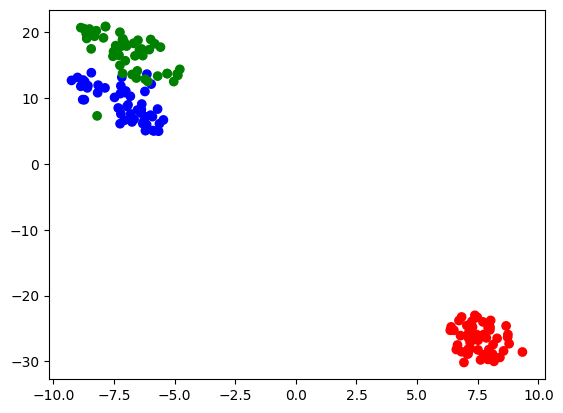

In [36]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

In [ ]:
# applying tsne on W2v , tf-idf